<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/Linear%20Neural%20Networks/image_classification_data_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab/D2L.AI/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Libraries

In [2]:
!pip install mxnet

Importing Libraries

In [0]:
%matplotlib inline
import d2l
from mxnet.gluon import data as gdata
import sys
import time

Getting the Data

In [0]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [5]:
print(len(mnist_train), len(mnist_test))

feature, label = mnist_train[0]
print(feature.shape, feature.dtype)

print(label, type(label), label.dtype)

60000 10000
(28, 28, 1) <class 'numpy.uint8'>
2 <class 'numpy.int32'> int32


In [6]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

print(get_fashion_mnist_labels(list(range(10))))

['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


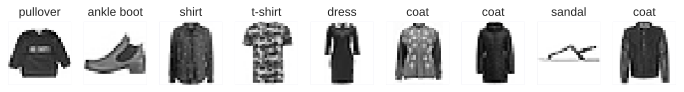

In [7]:
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # Here _ means that we ignore (not use) variables
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

Reading a Minibatch

In [0]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    # 0 means no additional processes are needed to speed up the reading of
    # data
    num_workers = 0
else:
    num_workers = 4

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
                              batch_size, shuffle=True,
                              num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                             batch_size, shuffle=False,
                             num_workers=num_workers)

In [9]:
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'4.90 sec'